# Machine Learning

In this file, instructions how to approach the challenge can be found.

We are going to work on different types of Machine Learning problems:

- **Regression Problem**: The goal is to predict delay of flights.
- **(Stretch) Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **(Stretch) Binary Classification**: The goal is to predict if the flight will be cancelled.

In [74]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',False)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, r2_score
import xgboost as xgb
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

In [ ]:
#LOADING THE TRAINING DATA

In [19]:
df_flights2 = pd.read_csv('/Users/annajose/Downloads/cleaned_flights.csv')

In [20]:
df_flights2.head()

fl_date op_unique_carrier origin  ... precipMM  visibility  windspeedKmph
0  2019-09-13                OO    BOI  ...      0.0          10             13
1  2019-11-18                B6    HPN  ...     12.0           8             18
2  2019-11-08                AS    JFK  ...      0.6           9             29
3  2019-08-25                DL    ATL  ...     10.1          10             14
4  2019-05-22                DL    CMH  ...      0.3           9             20

[5 rows x 19 columns]

In [25]:
df_test = pd.read_csv('/Users/annajose/Downloads/flights_test.csv')

## Main Task: Regression Problem

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

### Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

In [ ]:
(FEATURED ON ANOTHER NOTEBOOK)

### Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

### Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

#### Random forest

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [5]:
one_hot = pd.get_dummies(df_flights2[['crs_dep_bin','crs_arr_bin']])


In [6]:
df_flights2 = pd.concat([df_flights,one_hot],axis=1)

In [21]:
df_flights2 = df_flights.drop(['op_unique_carrier','origin','dest','origin','dest','fl_date','date_time','location','crs_dep_bin','crs_arr_bin'],axis=1)

In [22]:
df_flights2

crs_dep_time  crs_arr_time  ...  visibility  windspeedKmph
0                 8            13  ...          10             13
1                10            13  ...           8             18
2                20            23  ...           9             29
3                13            13  ...          10             14
4                19            21  ...           9             20
...             ...           ...  ...         ...            ...
19570            10            13  ...          10              9
19571            13            14  ...           4              5
19572            10            12  ...          10              9
19573            15            21  ...          10              9
19574            14            16  ...           9             20

[19575 rows x 11 columns]

In [23]:
X = df_flights2.drop(['arr_delay'],axis=1)
y = df_flights2['arr_delay']

In [24]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns=X.columns)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [26]:
rf = RandomForestRegressor(n_estimators=100)

In [27]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [36]:
y_pred = rf.predict(X_test)

In [37]:
rf_rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rf_rmse)

53.19456727348347


In [38]:
metrics.r2_score(y_test,y_pred)

-0.04359278188223814

In [62]:
difference = y_pred-y_test

In [63]:
rf_df = pd.DataFrame({'y_pred':y_pred,
                       'y_test':y_test,
                       'difference':difference})

In [64]:
rf_df.describe()

y_pred       y_test   difference
count  4894.000000  4894.000000  4894.000000
mean      8.762513     4.814262     3.948251
std      19.107000    52.077020    53.053260
min     -22.640000   -55.000000 -1119.730000
25%      -3.257500   -15.000000    -2.735000
50%       3.915000    -7.000000    10.450000
75%      14.827500     7.000000    22.960000
max     222.290000  1150.000000   230.290000

In [65]:
rf_df.head(20)

y_pred  y_test  difference
16350    5.99    21.0      -15.01
11824   29.02    -8.0       37.02
6529    15.10   141.0     -125.90
8149    58.79   -20.0       78.79
14590  109.06     8.0      101.06
9654    -3.16   -28.0       24.84
4999     0.00   -10.0       10.00
14440   24.74    -9.0       33.74
19166    9.36     5.0        4.36
1552     0.78   -16.0       16.78
15902   -2.80   -17.0       14.20
2381    -3.00   -29.0       26.00
6549    25.66   -14.0       39.66
15965   -5.62    -2.0       -3.62
6721    59.36    25.0       34.36
10784   11.32    -3.0       14.32
9976    14.04     7.0        7.04
139     -3.61   -18.0       14.39
5904    33.94    30.0        3.94
8596    14.41   230.0     -215.59

In [32]:
importance = rf.feature_importances_

Feature: 0, Score: 0.08511
Feature: 1, Score: 0.07437
Feature: 2, Score: 0.15953
Feature: 3, Score: 0.18970
Feature: 4, Score: 0.08718
Feature: 5, Score: 0.08590
Feature: 6, Score: 0.02066
Feature: 7, Score: 0.14577
Feature: 8, Score: 0.03652
Feature: 9, Score: 0.11526


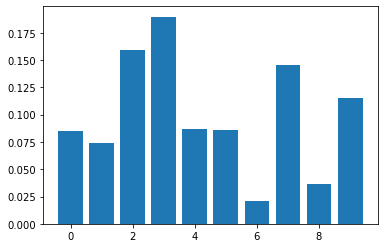

In [33]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

GridSearchCV

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
params = {
    'n_estimators': [50,100,150,200,250,300],
    'max_depth': [1,3,5,7,9]
}
n=5

In [51]:
rf = RandomForestRegressor()

In [52]:
grid = GridSearchCV(estimator=rf,param_grid=params,cv=n,scoring='r2',verbose=1,n_jobs=-1)

In [53]:
grid_results = grid.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [54]:
grid_pred = grid_results.predict(X_test)

In [72]:
best_score = grid_results.best_score_
best_params = grid_results.best_params_

In [77]:
r2_score(y_test,grid_pred)

0.022876930407934926

In [73]:
print('Best Score:',best_r2)
print('Best Params:',best_params)

Best Score: 0.0315531691573635
Best Params: {'max_depth': 3, 'n_estimators': 250}


In [57]:
grid_diff = grid_pred-y_test

grid_df = pd.DataFrame({'grid_pred':grid_pred,
                       'y_test':y_test,
                       'difference':grid_diff})

In [58]:
grid_df.head()

grid_pred  y_test  difference
16350   7.937466    21.0  -13.062534
11824   2.229338    -8.0   10.229338
6529    0.242294   141.0 -140.757706
8149   36.145360   -20.0   56.145360
14590  38.628112     8.0   30.628112

In [59]:
grid_df.describe()

grid_pred       y_test   difference
count  4894.000000  4894.000000  4894.000000
mean      5.494923     4.814262     0.680661
std       9.049947    52.077020    51.473391
min      -2.489340   -55.000000 -1139.524712
25%       0.816561   -15.000000    -2.237617
50%       3.140585    -7.000000    10.354818
75%       4.569012     7.000000    19.715175
max      67.368518  1150.000000    72.354751



XGB

In [39]:
import xgboost as xgb

In [40]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [41]:
xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree = 0.3, learning_rate = 0.1, max_depth=9,alpha=10,n_estimators=250)

In [42]:
xg_reg.fit(X_train,y_train)

[09:31:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [43]:
xg_pred = xg_reg.predict(X_test)

In [44]:
rmse = np.sqrt(mean_squared_error(y_test,xg_pred))
print('RMSE: ',rmse)

RMSE:  52.88953633005847


In [45]:
xgb_diff = xg_pred-y_test

xgb_df = pd.DataFrame({'xg_pred':xg_pred,
                       'y_test':y_test,
                       'difference':xgb_diff})

In [124]:
xgb_df.head()

xg_pred  y_test  difference
775    4.184173    -7.0   11.184173
527    0.761280    -9.0    9.761280
553   -7.256130   -14.0    6.743870
2831   5.454278    -3.0    8.454278
2047  31.143843    37.0   -5.856157

In [46]:
metrics.r2_score(y_test,xg_pred)

-0.0316586532423091

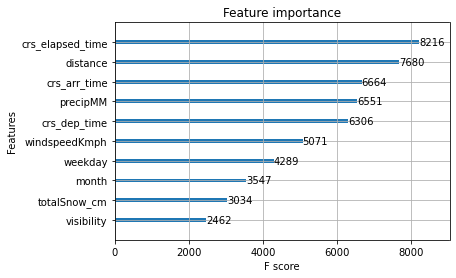

In [47]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

In [66]:
print(rf_df.describe())
print("\n")
print(grid_df.describe())
print("\n")
print(xgb_df.describe())

            y_pred       y_test   difference
count  4894.000000  4894.000000  4894.000000
mean      8.762513     4.814262     3.948251
std      19.107000    52.077020    53.053260
min     -22.640000   -55.000000 -1119.730000
25%      -3.257500   -15.000000    -2.735000
50%       3.915000    -7.000000    10.450000
75%      14.827500     7.000000    22.960000
max     222.290000  1150.000000   230.290000


         grid_pred       y_test   difference
count  4894.000000  4894.000000  4894.000000
mean      5.494923     4.814262     0.680661
std       9.049947    52.077020    51.473391
min      -2.489340   -55.000000 -1139.524712
25%       0.816561   -15.000000    -2.237617
50%       3.140585    -7.000000    10.354818
75%       4.569012     7.000000    19.715175
max      67.368518  1150.000000    72.354751


           xg_pred       y_test   difference
count  4894.000000  4894.000000  4894.000000
mean      5.949933     4.814262     1.135670
std      18.277834    52.077020    52.882745
min   

### Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

You are required to predict delays on **out of sample** data from **first 7 days (1st-7th) of January 2020** and to share the file with LighthouseLabs. Sample submission can be found in the file **_sample_submission.csv_**

======================================================================
## Stretch Tasks

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

### Binary Classification

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.